## 군집화 (Clustering)
비지도 학습

데이터의 성질로부터 최적으로 분할하고 레이블 구함

> 활용 분야

시장 분할, 지도에서 가까운 지점 병합, 영사 압축, 자료에 새로 레이블 부여, 이상행동 감지

> 방법론

        K-means clustering

        DBSCAN

### K-means clustering
레이블이 없는 다차원 데이터 세트 내에 사전 정의된 군집의 개수를 찾아내는 방법

최적의 군집화 / '군집 중앙'은 해당 군집에 속하는 모든 점의 산술 평균, 각 점은 다른 군집의 중앙보다 자신이 속한 군집의 중앙에 더 가깝다

[1 0 3 0 1 1 2 3 0 0 2 0 3 0 1 3 3 1 2 2 1 1 3 2 2 3 1 3 2 3 0 0 3 0 0 0 0
 0 2 1 3 2 3 3 2 2 0 2 0 1 2 1 0 1 1 2 0 2 0 1 0 3 0 2 2 2 0 1 0 2 3 2 0 2
 2 0 2 3 1 0 1 3 1 1 0 3 1 3 0 0 3 1 0 2 2 3 1 1 3 2 0 1 0 1 3 1 1 3 0 3 2
 2 1 0 1 3 0 1 1 3 2 1 2 1 1 1 1 2 1 2 0 2 2 1 0 2 2 0 3 0 0 2 3 2 3 2 0 3
 0 0 0 3 0 3 1 2 0 2 1 3 0 3 3 1 3 2 2 3 1 3 3 0 1 3 2 0 1 1 3 2 1 3 2 2 3
 3 3 3 1 0 3 2 3 3 2 2 2 3 2 0 3 2 1 2 3 0 2 0 3 0 3 2 3 3 0 2 2 1 1 3 0 1
 1 2 1 2 3 0 0 3 3 0 3 1 2 3 1 2 0 2 1 3 1 0 0 0 0 2 2 0 3 2 1 3 2 2 2 1 1
 0 3 3 2 1 0 2 3 0 3 1 1 2 2 3 1 1 1 3 0 0 1 1 3 1 1 1 0 2 0 3 1 1 0 0 0 1
 1 3 0 2]


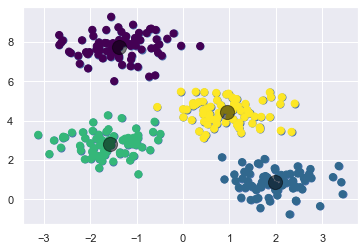

In [4]:
# 군집화를 보여주기 위한 데이터
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets._samples_generator import make_blobs

# 4개 영역의 2차원 자료의 생성
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:, 1], s=50)

# K-means 군집화 모델 인스턴스화 및 학습
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# K-means 군집화
y_kmeans = kmeans.predict(X)
print(y_kmeans)

# K-means 군집화, 결과 시각화
# 그룹별로 색깔을 달리해 표현하기, 군집 중앙 표시
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


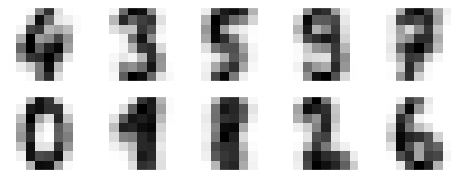

In [7]:
# k-means를 필기체 숫자 인식에 적용
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

fig, ax = plt.subplots(2, 5, figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)